# Analysis

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")
clean_coffee = coffee[coffee["subdivision"] == "Minas Gerais"]

# import weather data
weather = pd.read_csv("../data/weather/weather_data.csv")

In [3]:
# TODO: Merge these two dataframes together

analysis_table = pd.merge(clean_coffee, weather, on="year")

In [4]:
# TODO: View the first 5 rows of your data

analysis_table.head()

,country,subdivision_x,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision_y
0,Brazil,Minas Gerais,Arabica,16.30,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,Brazil,Minas Gerais,Arabica,23.70,2007,563.0,5730.0,186.0,2245.0,2552.0,3030.0,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,Brazil,Minas Gerais,Arabica,16.85,2008,679.0,5720.0,196.0,2235.0,2559.0,3468.0,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,Brazil,Minas Gerais,Arabica,25.55,2009,663.0,5770.0,188.0,2223.0,2596.0,3527.0,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,Brazil,Minas Gerais,Arabica,22.10,2010,873.0,5725.0,244.0,2151.0,2662.0,3578.0,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais


In [5]:
# TODO: Check for null values 

analysis_table.isna().sum()

country                         0
subdivision_x                   0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                1
bearing_trees                   1
nonbear_hectares                1
bearing_hectares                1
bearing_trees_per_hectare       1
nonbearing_trees_per_hectare    1
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision_y                   0
dtype: int64

In [6]:
analysis_table[analysis_table.isna().any(axis=1)]

,country,subdivision_x,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision_y
12,Brazil,Minas Gerais,Arabica,28.3,2018,NaN,NaN,NaN,NaN,NaN,NaN,3.567568,21.325718,28.659459,16.174324,98.290541,47.047297,8.205405,0.90109,Minas Gerais


In [8]:
# TODO: Drop rows that contain null values

clean_table = analysis_table.dropna()
clean_table.isna().sum()

country                         0
subdivision_x                   0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision_y                   0
dtype: int64

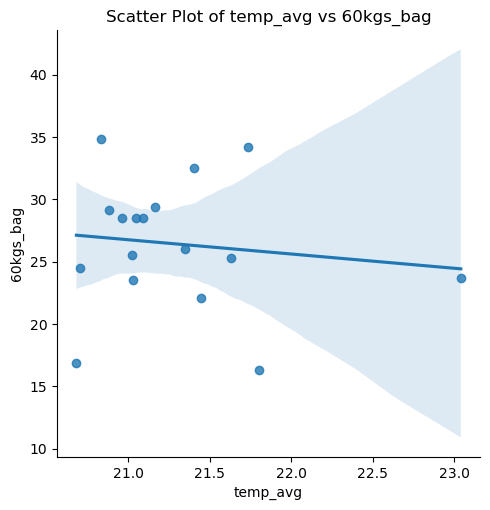

Equation of the line of best fit: y = -1.14x + 50.77


In [10]:
# TODO: BEGIN YOUR EDA!

sns.lmplot(data=clean_table, x="temp_avg", y="60kgs_bag")
plt.title("Scatter Plot of temp_avg vs 60kgs_bag")
plt.show()

coeffs = np.polyfit(clean_table["temp_avg"].values, clean_table["60kgs_bag"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

In [11]:
clean_table[["temp_avg", "60kgs_bag"]].corr()

,temp_avg,60kgs_bag
temp_avg,1.000000,-0.124772
60kgs_bag,-0.124772,1.000000


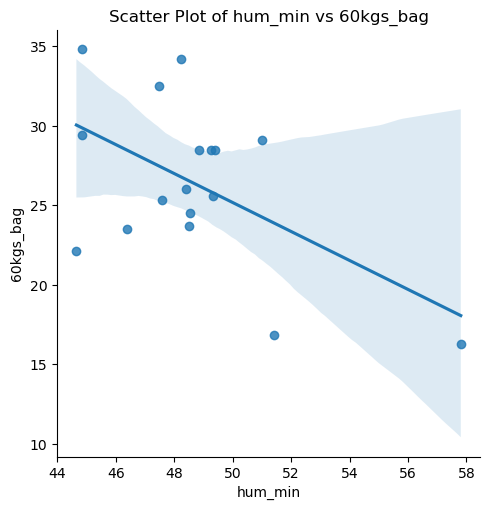

Equation of the line of best fit: y = -0.91x + 70.70


In [12]:
sns.lmplot(data=clean_table, x="hum_min", y="60kgs_bag")
plt.title("Scatter Plot of hum_min vs 60kgs_bag")
plt.show()

coeffs = np.polyfit(clean_table["hum_min"].values, clean_table["60kgs_bag"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

In [13]:
clean_table[["hum_min", "60kgs_bag"]].corr()

,hum_min,60kgs_bag
hum_min,1.000000,-0.540171
60kgs_bag,-0.540171,1.000000


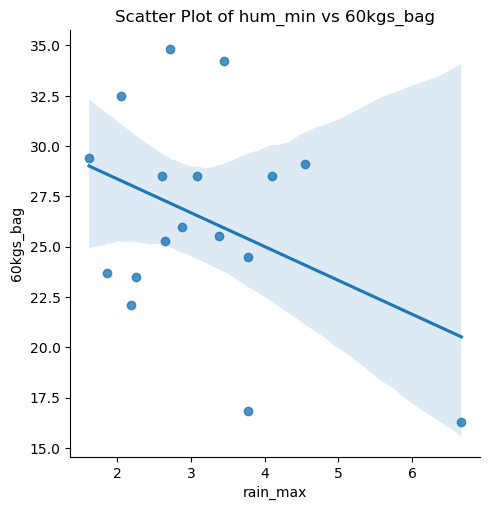

Equation of the line of best fit: y = -1.68x + 31.72


In [14]:
sns.lmplot(data=clean_table, x="rain_max", y="60kgs_bag")
plt.title("Scatter Plot of hum_min vs 60kgs_bag")
plt.show()

coeffs = np.polyfit(clean_table["rain_max"].values, clean_table["60kgs_bag"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

In [15]:
clean_table[["rain_max", "60kgs_bag"]].corr()

,rain_max,60kgs_bag
rain_max,1.000000,-0.395811
60kgs_bag,-0.395811,1.000000


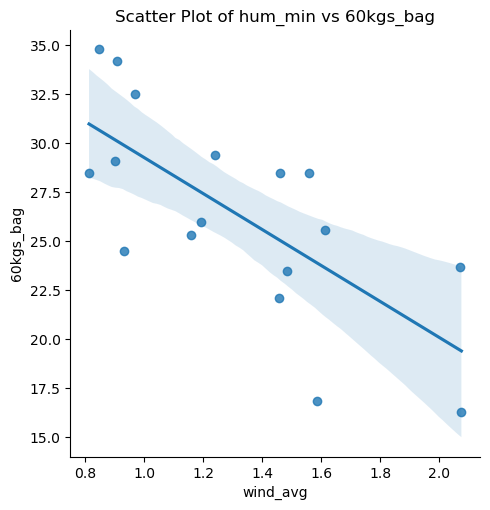

Equation of the line of best fit: y = -9.18x + 38.45


In [16]:
sns.lmplot(data=clean_table, x="wind_avg", y="60kgs_bag")
plt.title("Scatter Plot of hum_min vs 60kgs_bag")
plt.show()

coeffs = np.polyfit(clean_table["wind_avg"].values, clean_table["60kgs_bag"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

In [17]:
clean_table[["wind_avg", "60kgs_bag"]].corr()

,wind_avg,60kgs_bag
wind_avg,1.000000,-0.707327
60kgs_bag,-0.707327,1.000000


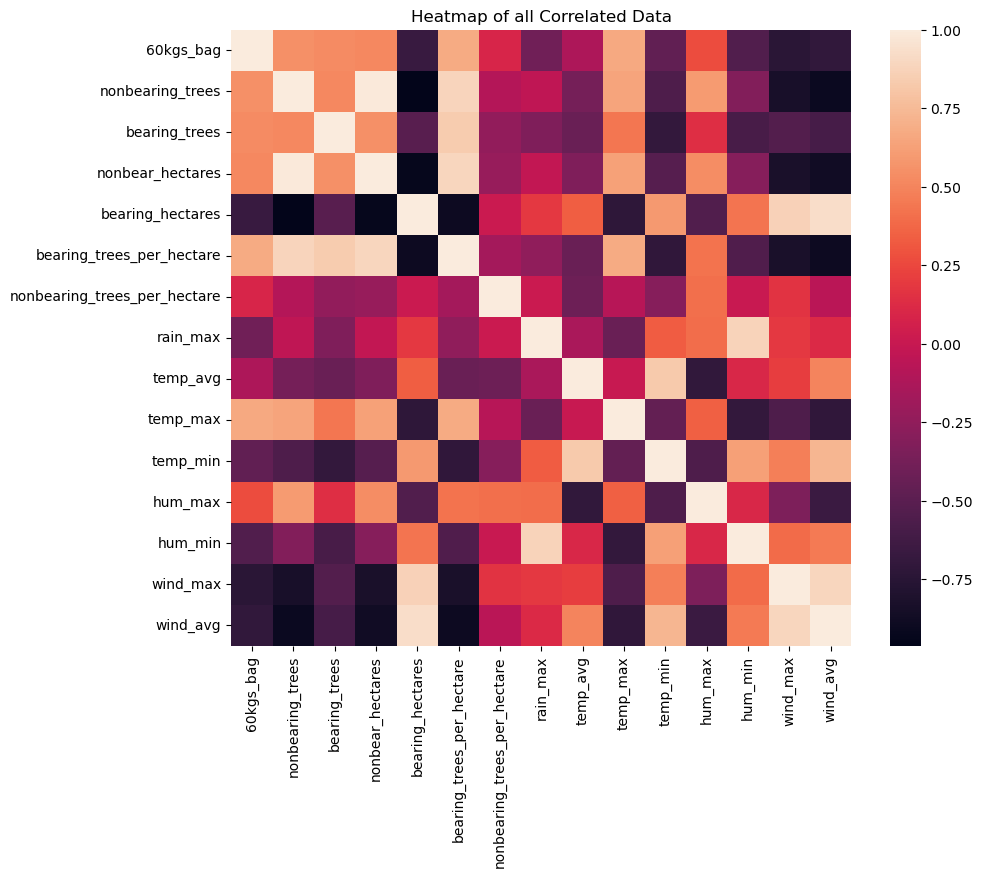

In [33]:
num_data_only = clean_table[clean_table.select_dtypes(include=['int64', 'float64']).columns]
clean_num_data = num_data_only.drop("year", axis=1)
clean_num_corr = clean_num_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(clean_num_corr)
plt.title("Heatmap of all Correlated Data")
plt.show()

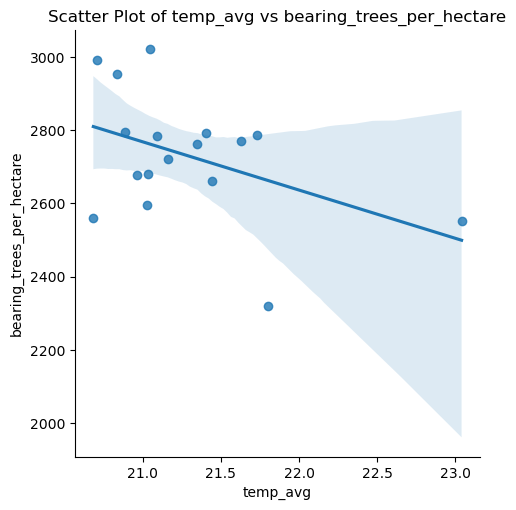

Equation of the line of best fit: y = -131.55x + 5530.09


In [39]:
# temp_avg vs bearing_trees_per_hectare

sns.lmplot(data=clean_table, x="temp_avg", y="bearing_trees_per_hectare")
plt.title("Scatter Plot of temp_avg vs bearing_trees_per_hectare")
plt.show()

coeffs = np.polyfit(clean_table["temp_avg"].values, clean_table["bearing_trees_per_hectare"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

In [40]:
clean_table[["temp_avg", "bearing_trees_per_hectare"]].corr()

,temp_avg,bearing_trees_per_hectare
temp_avg,1.000000,-0.432076
bearing_trees_per_hectare,-0.432076,1.000000


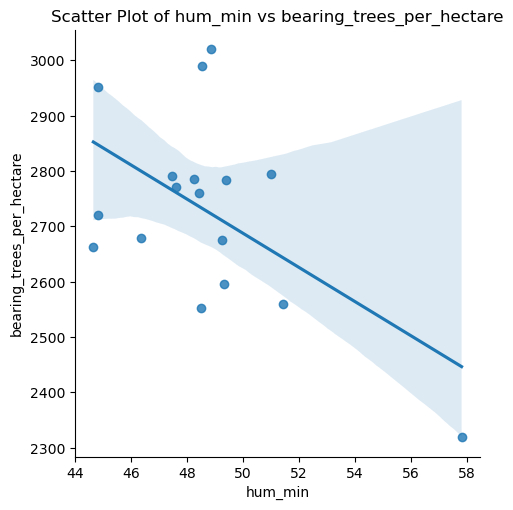

Equation of the line of best fit: y = -30.86x + 4230.65


In [41]:
# hum_min vs bearing_trees_per_hectare

sns.lmplot(data=clean_table, x="hum_min", y="bearing_trees_per_hectare")
plt.title("Scatter Plot of hum_min vs bearing_trees_per_hectare")
plt.show()

coeffs = np.polyfit(clean_table["hum_min"].values, clean_table["bearing_trees_per_hectare"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

In [42]:
clean_table[["hum_min", "bearing_trees_per_hectare"]].corr()

,hum_min,bearing_trees_per_hectare
hum_min,1.000000,-0.551204
bearing_trees_per_hectare,-0.551204,1.000000


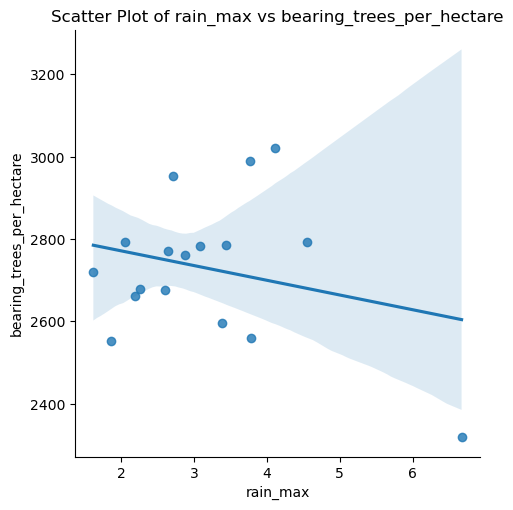

Equation of the line of best fit: y = -35.74x + 2842.88


In [43]:
# rain_max vs bearing_trees_per_hectare

sns.lmplot(data=clean_table, x="rain_max", y="bearing_trees_per_hectare")
plt.title("Scatter Plot of rain_max vs bearing_trees_per_hectare")
plt.show()

coeffs = np.polyfit(clean_table["rain_max"].values, clean_table["bearing_trees_per_hectare"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

In [44]:
clean_table[["rain_max", "bearing_trees_per_hectare"]].corr()

,rain_max,bearing_trees_per_hectare
rain_max,1.000000,-0.253524
bearing_trees_per_hectare,-0.253524,1.000000


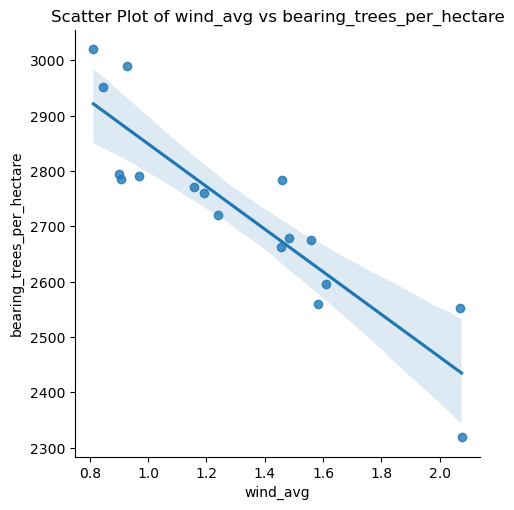

Equation of the line of best fit: y = -385.36x + 3234.65


In [45]:
# wind_avg vs bearing_trees_per_hectare

sns.lmplot(data=clean_table, x="wind_avg", y="bearing_trees_per_hectare")
plt.title("Scatter Plot of wind_avg vs bearing_trees_per_hectare")
plt.show()

coeffs = np.polyfit(clean_table["wind_avg"].values, clean_table["bearing_trees_per_hectare"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

In [46]:
clean_table[["wind_avg", "bearing_trees_per_hectare"]].corr()

,wind_avg,bearing_trees_per_hectare
wind_avg,1.000000,-0.893987
bearing_trees_per_hectare,-0.893987,1.000000


In [47]:
clean_table[["bearing_trees_per_hectare", "60kgs_bag"]].corr()

,bearing_trees_per_hectare,60kgs_bag
bearing_trees_per_hectare,1.000000,0.677437
60kgs_bag,0.677437,1.000000


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: temp_avg and 60kgs_bag appear to have a slight negative correlation of about a drop in yield of 1.14 million bags to every 1 degree Celsius increase in average temperature. This relationship, however, is fairly weak according to the associated Pearson's correlation of -0.1247722.

What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: Minimum humidity and 60kgs_bag appear to have a more drastic negative correlation of a drop in yield of .91 million bags to every 1 perecent increase in minimum humidity. This relationship is shown to be a moderately negative linear relationship with it's Pearson correlation of -0.540171.

What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: rain_max and 60kgs_bag also have a negative relationship, where every additional mm of rain decreases coffee yields by 1.68 million bags. Their Pearson's correlation coefficent of -0.395811 indicate that they have a moderate negative linear relationship.

What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: Average wind speed and 60kgs_bag have the strongest looking negative relationship, where every additional meter per second increase in wind speed decreases coffee yield by 9.18 million bags. The Pearson's correlation coefficent between these two variables is -0.707327, indicating a strong negative linear relationship.

Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

Ans: All of these weather variables plotted against bearing_trees_per_hectare result in negative trends, where each weather column is determined to have Pearson's correlation coefficents of;

temp_avg: -0.432076	[moderately negative linear relationship]
hum_min: -0.551204	[moderately negative " "]
rain_max: -0.253524	[slightly negative " "]
wind_avg: -0.893987	[strong negative linear relationship]

Which weather factor seems to influence coffee production the most? 

Ans: Average wind speeds appear to influence coffee production the most, as we can see that it has the strongest influence on bearing trees per hectare. This in turn can be seen to be directly tied to the amount of bags of coffee produced, with a Pearson's correlation coefficent of 0.677437, a moderately strong, postive linear relationship.

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

Ans: 

If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

Ans: 